<a href="https://colab.research.google.com/github/rizky-gumelar/Fall-Detection-Transfer-Learning-Binary-/blob/main/Binary_Transfer_Learning_of_DataSlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c data-slayer-2-0-machine-learning-competition

 97% 604M/623M [00:06<00:00, 225MB/s]
100% 623M/623M [00:06<00:00, 93.3MB/s]


In [ ]:
import zipfile

# Path ke file ZIP yang ingin diekstrak
zip_path = "/content/data-slayer-2-0-machine-learning-competition.zip"

# Path tujuan di Google Drive
extract_to = "/content/drive/MyDrive/ComVis/DataSlayer"

# Ekstraksi file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("File berhasil diekstrak ke:", extract_to)

File berhasil diekstrak ke: /content/drive/MyDrive/ComVis/DataSlayer


In [ ]:
# Path file sumber di Colab
source = "/content/data-slayer-2-0-machine-learning-competition.zip"

# Path tujuan di Google Drive
destination = "/content/drive/MyDrive/ComVis/DataSlayer"

# Copy file
!cp "$source" "$destination"

print("File berhasil dicopy ke:", destination)

File berhasil dicopy ke: /content/drive/MyDrive/ComVis/DataSlayer


# **Run disini**

instal mediapipe

In [ ]:
!pip install -q mediapipe
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 55.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

ekstrak dataset

In [ ]:
import os
import zipfile
zip_path = '/content/drive/MyDrive/DataSlayer/data-slayer-2-0-machine-learning-competition.zip'
extract_path = '/content/dataset'  # Tempat untuk mengekstrak file

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Cek apakah dataset berhasil diekstrak
os.listdir(extract_path)

['train', 'sample_submission.csv', 'test']

cek struktur folder

In [ ]:
import os

for root, dirs, files in os.walk('/content/dataset/train'):
    level = root.replace('/content/dataset/train', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}- {os.path.basename(root)}/")  # Cetak hanya folder

- train/
  - subject-4/
    - non_fall/
      - 4_squat/
      - 4_stretching/
      - 4_walking/
      - 4_laying/
      - 4_jumping/
      - 4_picking/
    - fall/
      - 4_standing_falls/
      - 4_right_falls/
      - 4_backward_falls/
      - 4_left_falls/
      - 4_forward_falls/
      - 4_sitting_falls/
  - subject-3/
    - non_fall/
      - 3_laying/
      - 3_squat/
      - 3_stretching/
      - 3_jumping/
      - 3_picking/
      - 3_walking/
    - fall/
      - 3_sitting_falls/
      - 3_forward_falls/
      - 3_standing_falls/
      - 3_backward_falls/
      - 3_left_falls/
      - 3_right_falls/
  - subject-2/
    - non_fall/
      - 2_stretching/
      - 2_picking/
      - 2_laying/
      - 2_walking/
      - 2_jumping/
      - 2_squat/
    - fall/
      - 2_sitting_falls/
      - 2_standing_falls/
      - 2_right_falls/
      - 2_backward_falls/
      - 2_left_falls/
      - 2_forward_falls/
  - subject-1/
    - non_fall/
      - 1_walking/
      - 1_stretching/
      -

mengubah struktur folder

In [ ]:
import os
import shutil

# Direktori asal
source_dir = '/content/dataset/train/'

# Direktori tujuan
destination_dir = '/content/train_fall_nonfall/'
fall_dir = os.path.join(destination_dir, 'fall')
non_fall_dir = os.path.join(destination_dir, 'non_fall')

# Buat folder tujuan jika belum ada
os.makedirs(fall_dir, exist_ok=True)
os.makedirs(non_fall_dir, exist_ok=True)

# Fungsi untuk memastikan file memiliki nama unik
def get_unique_filename(dst_dir, filename):
    base, ext = os.path.splitext(filename)
    counter = 1
    unique_name = filename
    while os.path.exists(os.path.join(dst_dir, unique_name)):
        unique_name = f"{base}_{counter}{ext}"
        counter += 1
    return unique_name

# Loop melalui semua subject
for subject in os.listdir(source_dir):
    subject_path = os.path.join(source_dir, subject)
    if not os.path.isdir(subject_path):
        continue

    # Proses folder fall
    fall_path = os.path.join(subject_path, 'fall')
    if os.path.exists(fall_path):
        for sub_folder in os.listdir(fall_path):
            sub_folder_path = os.path.join(fall_path, sub_folder)
            for file in os.listdir(sub_folder_path):
                src_file = os.path.join(sub_folder_path, file)
                unique_name = get_unique_filename(fall_dir, file)
                dst_file = os.path.join(fall_dir, unique_name)
                shutil.copy(src_file, dst_file)  # Menggunakan copy agar file asli tetap ada

    # Proses folder non_fall
    non_fall_path = os.path.join(subject_path, 'non_fall')
    if os.path.exists(non_fall_path):
        for sub_folder in os.listdir(non_fall_path):
            sub_folder_path = os.path.join(non_fall_path, sub_folder)
            for file in os.listdir(sub_folder_path):
                src_file = os.path.join(sub_folder_path, file)
                unique_name = get_unique_filename(non_fall_dir, file)
                dst_file = os.path.join(non_fall_dir, unique_name)
                shutil.copy(src_file, dst_file)  # Menggunakan copy agar file asli tetap ada

print("File berhasil dipindahkan ke folder fall dan non_fall dengan penamaan unik.")

File berhasil dipindahkan ke folder fall dan non_fall dengan penamaan unik.


In [ ]:
## KODE HARAM
import os
import shutil
import pandas as pd

# File CSV dan folder asal gambar
csv_file = '/content/testing_kesekianKalinya91.csv'  # Ganti dengan nama file CSV Anda
source_folder = '/content/dataset/test'  # Folder asal gambar
destination_base_folder = '/content/test_fall_nonfall'  # Folder dasar untuk gambar yang dipisahkan

# Membaca file CSV
df = pd.read_csv(csv_file)

# Mapping label ke nama folder
label_mapping = {
    '0': 'non_fall',
    '1': 'fall'
}

# Membuat folder untuk setiap label jika belum ada
for label, folder_name in label_mapping.items():
    folder_path = os.path.join(destination_base_folder, folder_name)
    os.makedirs(folder_path, exist_ok=True)

# Memproses setiap baris di file CSV
for _, row in df.iterrows():
    image_file = row['id']
    label = str(row['final_pred'])  # Pastikan label dalam bentuk string
    folder_name = label_mapping[label]  # Dapatkan nama folder berdasarkan label
    source_path = os.path.join(source_folder, image_file)
    destination_path = os.path.join(destination_base_folder, folder_name, image_file)

    # Memastikan file sumber ada
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
        print(f"Copied {image_file} to {folder_name} folder.")
    else:
        print(f"File {image_file} not found in source folder.")


Copied 158497c8b8.jpg to fall folder.
Copied 9218195de0.jpg to non_fall folder.
Copied 72a8f7fbd1.jpg to non_fall folder.
Copied bb9fef6bcf.jpg to non_fall folder.
Copied 9a9f29d582.jpg to non_fall folder.
Copied bd2b9eaa85.jpg to non_fall folder.
Copied d9da9e5fa3.jpg to non_fall folder.
Copied a42a9a3e16.jpg to non_fall folder.
Copied 452ecad152.jpg to fall folder.
Copied a56a12394d.jpg to non_fall folder.
Copied 23255749fd.jpg to non_fall folder.
Copied 20bb1d978b.jpg to fall folder.
Copied 86b31415e7.jpg to non_fall folder.
Copied 93b40311c7.jpg to non_fall folder.
Copied d4e507225a.jpg to non_fall folder.
Copied e19ad17769.jpg to non_fall folder.
Copied 17c875d5e1.jpg to fall folder.
Copied 54d6fc6494.jpg to fall folder.
Copied 5908923186.jpg to non_fall folder.
Copied 615ff1be04.jpg to non_fall folder.
Copied f937ce30ee.jpg to non_fall folder.
Copied e8e2695121.jpg to non_fall folder.
Copied 417b0eef4d.jpg to fall folder.
Copied 3e30ae0406.jpg to fall folder.
Copied 9d5a0e9a1e.jp

In [ ]:
import os

for root, dirs, files in os.walk('/content/train_fall_nonfall'):
    level = root.replace('/content/train_fall_nonfall', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}- {os.path.basename(root)}/")  # Cetak hanya folder

- train_fall_nonfall/
  - non_fall/
  - fall/


In [ ]:
import os
import shutil

# Folder sumber
source_folders = ['/content/train_fall_nonfall', '/content/test_fall_nonfall']

# Folder tujuan
destination_base_folder = 'combined'
subfolders = ['fall', 'non_fall']

# Membuat subfolder di folder tujuan jika belum ada
for subfolder in subfolders:
    os.makedirs(os.path.join(destination_base_folder, subfolder), exist_ok=True)

# Memindahkan file dari sumber ke tujuan
for source_folder in source_folders:
    for subfolder in subfolders:
        source_path = os.path.join(source_folder, subfolder)
        destination_path = os.path.join(destination_base_folder, subfolder)

        # Memastikan folder sumber ada
        if os.path.exists(source_path):
            for file_name in os.listdir(source_path):
                source_file = os.path.join(source_path, file_name)
                destination_file = os.path.join(destination_path, file_name)

                # Menyalin file ke folder tujuan
                if os.path.isfile(source_file):
                    shutil.copy(source_file, destination_file)
                    print(f"Copied {file_name} to {destination_path}.")


Copied 555d0d8821.jpg to combined/fall.
Copied 5362e8562c.jpg to combined/fall.
Copied 89b62290fd.jpg to combined/fall.
Copied 1fae12e4cb.jpg to combined/fall.
Copied 57cfe834c7.jpg to combined/fall.
Copied 7abcc0af16.jpg to combined/fall.
Copied 9240478d88.jpg to combined/fall.
Copied f50f511941.jpg to combined/fall.
Copied fe3ac677f8.jpg to combined/fall.
Copied a35f554a4a.jpg to combined/fall.
Copied 7c472e48ca.jpg to combined/fall.
Copied 7eb11b32e3.jpg to combined/fall.
Copied f1ca55835d.jpg to combined/fall.
Copied 3491262ce1.jpg to combined/fall.
Copied beb53f29bf.jpg to combined/fall.
Copied e525632498.jpg to combined/fall.
Copied 6d59103c20.jpg to combined/fall.
Copied 66280a3461.jpg to combined/fall.
Copied d5be76a29b.jpg to combined/fall.
Copied 0d8031f778.jpg to combined/fall.
Copied b4b0b29169.jpg to combined/fall.
Copied c3122912da.jpg to combined/fall.
Copied b04ae661d8.jpg to combined/fall.
Copied 47aefec631.jpg to combined/fall.
Copied 50e99e414e.jpg to combined/fall.


Gambar dari dataset training:

Kelas: fall


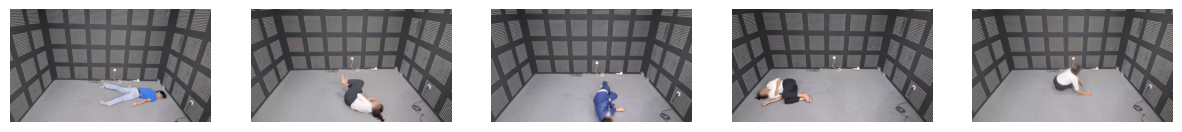


Kelas: non_fall


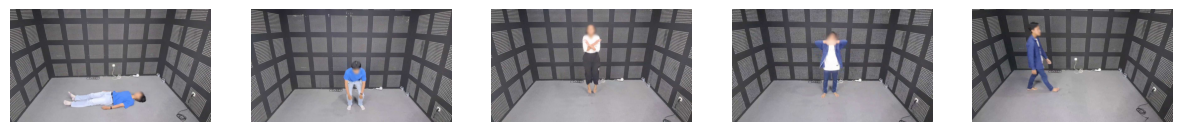

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk menampilkan beberapa gambar dari setiap kelas
def show_images_from_class(directory, num_images=5):
    classes = os.listdir(directory)

    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            # Ambil beberapa gambar pertama dari setiap kelas
            image_files = os.listdir(class_path)[:num_images]

            # Menampilkan gambar-gambar tersebut
            print(f"\nKelas: {class_name}")
            plt.figure(figsize=(15, 5))

            for i, image_file in enumerate(image_files):
                img_path = os.path.join(class_path, image_file)
                img = Image.open(img_path)

                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.axis('off')

            plt.show()

# Tampilkan gambar dari dataset training
print("Gambar dari dataset training:")
show_images_from_class('/content/train_fall_nonfall')

In [ ]:
import os

# Path ke direktori dataset baru (training dan testing)
train_dir = '/content/train_fall_nonfall'
# train_dir = '/content/output_masks'

os.makedirs(train_dir, exist_ok=True)

# Menghitung jumlah gambar di setiap kelas pada training data
print("Jumlah gambar di setiap kelas pada training set:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} gambar")


Jumlah gambar di setiap kelas pada training set:
non_fall: 2748 gambar
fall: 1546 gambar


Test pose landmark

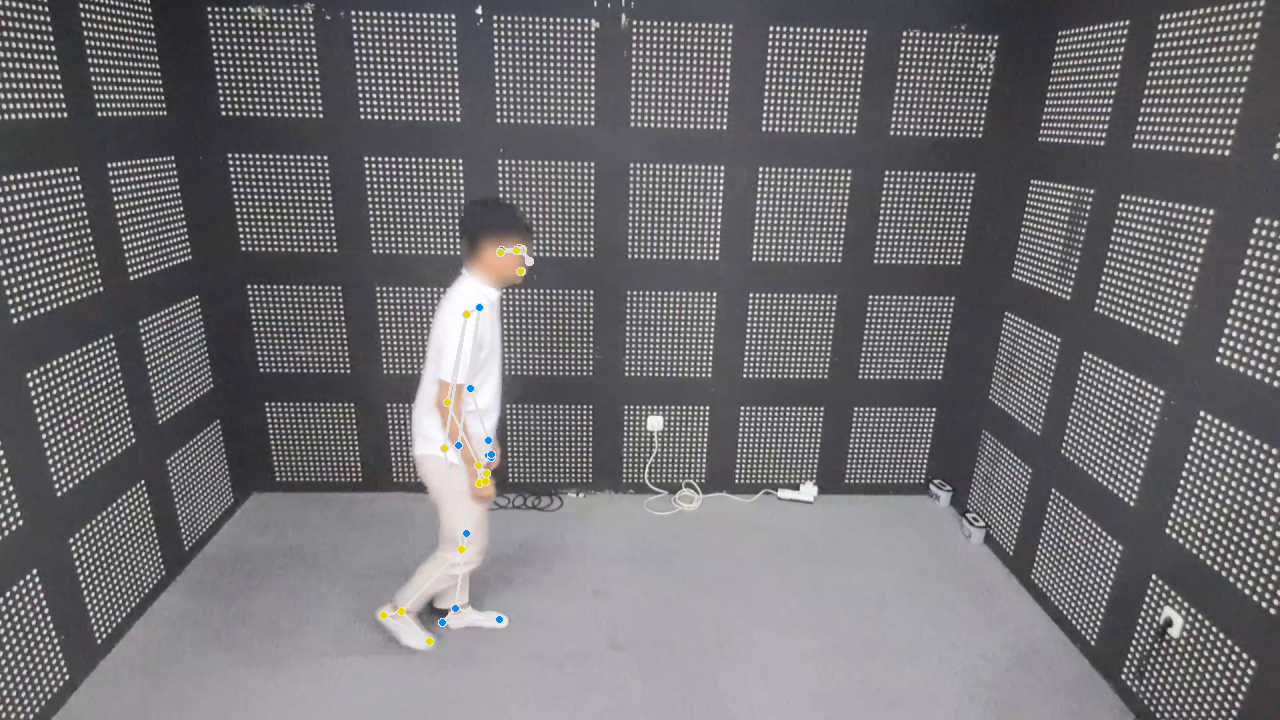

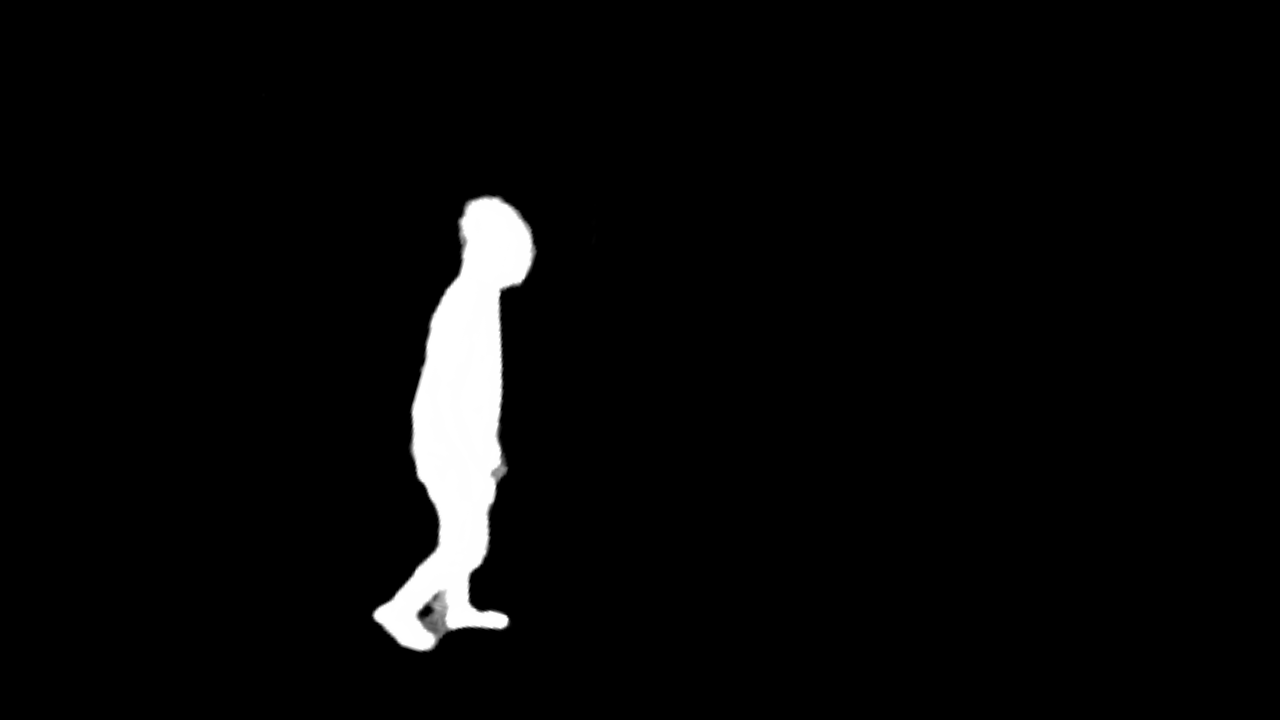

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
from google.colab.patches import cv2_imshow

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("/content/train_fall_nonfall/fall/frame001.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)

# Generate Dataset mediapipe

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import os

# STEP 2: Create a PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Define the input folder and output folder.
input_folder = "/content/train_fall_nonfall/"
output_folder = "/content/output_masks/"

# Create output directories if not exist
os.makedirs(os.path.join(output_folder, "fall"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "non_fall"), exist_ok=True)

# STEP 4: Process images in 'fall/' and 'non_fall/' directories.
for category in ["fall", "non_fall"]:
    input_category_folder = os.path.join(input_folder, category)
    output_category_folder = os.path.join(output_folder, category)

    for filename in os.listdir(input_category_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            input_image_path = os.path.join(input_category_folder, filename)
            output_image_path = os.path.join(output_category_folder, filename)

            # Load the input image.
            image = mp.Image.create_from_file(input_image_path)

            # Detect pose landmarks from the input image.
            detection_result = detector.detect(image)

            # Check if segmentation masks are available.
            if detection_result.segmentation_masks:
                # Generate the segmentation mask.
                segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
                visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255

                # Save the visualized mask as an image.
                visualized_mask = visualized_mask.astype(np.uint8)  # Ensure the data type is uint8.
                cv2.imwrite(output_image_path, visualized_mask)
            else:
                print(f"No segmentation mask for {filename}")

print("Segmentation masks have been saved successfully.")


No segmentation mask for frame011_17.jpg
No segmentation mask for frame025_10.jpg
No segmentation mask for frame024_13.jpg
No segmentation mask for frame044_20.jpg
No segmentation mask for frame039_10.jpg
No segmentation mask for frame001_21.jpg
No segmentation mask for frame019_7.jpg
No segmentation mask for frame013_17.jpg
No segmentation mask for frame007_16.jpg
No segmentation mask for frame008_16.jpg
No segmentation mask for frame018_7.jpg
No segmentation mask for frame010_2.jpg
No segmentation mask for frame020_7.jpg
No segmentation mask for frame033_6.jpg
No segmentation mask for frame012_21.jpg
No segmentation mask for frame027_13.jpg
No segmentation mask for frame052_15.jpg
No segmentation mask for frame098_6.jpg
No segmentation mask for frame064_4.jpg
No segmentation mask for frame048.jpg
No segmentation mask for frame046_17.jpg
No segmentation mask for frame056_4.jpg
No segmentation mask for frame045_17.jpg
No segmentation mask for frame080_4.jpg
No segmentation mask for fra

#Splitting

In [ ]:
!rm -r /content/data

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Membuat direktori untuk training dan testing

extract_path = '/content/train_fall_nonfall'
train_dir = '/content/data/train'
test_dir = '/content/data/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Dapatkan daftar kelas dari dataset yang diekstrak
classes = os.listdir(extract_path)

# Membuat subfolder berdasarkan kelas di dalam folder training dan testing
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Memisahkan dataset ke dalam training dan testing
for class_name in classes:
    class_path = os.path.join(extract_path, class_name)
    images = os.listdir(class_path)

    # Membagi data menjadi 80% training dan 20% testing
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Pindahkan file ke folder training
    for img in train_images:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(train_dir, class_name, img)
        shutil.move(src_path, dest_path)

    # Pindahkan file ke folder testing
    for img in test_images:
        src_path = os.path.join(class_path, img)
        dest_path = os.path.join(test_dir, class_name, img)
        shutil.move(src_path, dest_path)

# **Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalisasi pixel ke [0, 1]
    rotation_range=20,       # Rotasi gambar hingga 40 derajat
    width_shift_range=0.1,   # Geser gambar secara horizontal
    height_shift_range=0.1,  # Geser gambar secara vertikal
    shear_range=0.1,         # Geser sudut gambar
    # zoom_range=0.1,          # Zoom gambar
    horizontal_flip=True,    # Membalik gambar secara horizontal
    fill_mode='nearest',     # Mengisi ruang kosong yang dihasilkan dari transformasi
)

# Data generator untuk training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Ubah ukuran gambar sesuai kebutuhan
    batch_size=32,
    class_mode='binary',     # Karena dua kelas
    classes=['non_fall', 'fall']
    # color_mode='grayscale'   # Menggunakan mode grayscale
    # color_mode='rgb'         # Gambar dalam mode RGB
)

# Data generator untuk validasi
val_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['non_fall', 'fall']
    # color_mode='grayscale'   # Menggunakan mode grayscale
    # color_mode='rgb'         # Gambar dalam mode RGB
)

train_data = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, ), dtype=tf.float32)  # Adjusted for binary labels
    )
).repeat()

validation_data = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, ), dtype=tf.float32)  # Adjusted for binary labels
    )
).repeat()

# Melihat mapping label
print(train_generator.class_indices)



Found 3434 images belonging to 2 classes.
Found 860 images belonging to 2 classes.
{'non_fall': 0, 'fall': 1}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi data untuk kelas fall
fall_augmentor = ImageDataGenerator(
    rotation_range=30,         # Rotasi hingga 30 derajat
    width_shift_range=0.2,     # Pergeseran horizontal hingga 20%
    height_shift_range=0.2,    # Pergeseran vertikal hingga 20%
    shear_range=0.2,           # Distorsi shearing
    zoom_range=0.2,            # Zoom hingga 20%
    horizontal_flip=True,      # Membalik secara horizontal
    fill_mode='nearest'        # Mengisi piksel kosong setelah transformasi
)

# Buat generator untuk kelas fall
fall_generator = fall_augmentor.flow_from_directory(
    directory='/content/data/train',   # Arahkan ke folder utama train
    target_size=(224, 224),    # Ukuran gambar
    batch_size=32,             # Ukuran batch
    classes=['fall'],          # Hanya gunakan kelas fall
    class_mode='binary'
)

Found 1236 images belonging to 1 classes.


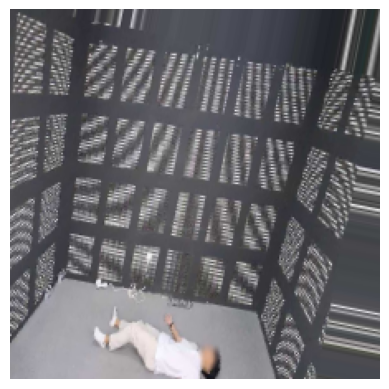

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch dari generator (training atau validation)
x_batch, y_batch = next(train_generator)  # Anda bisa mengganti train_generator dengan val_generator untuk validasi

# Pilih gambar pertama dari batch (batch size adalah 32, kita ambil gambar pertama)
image = x_batch[0]

# Menampilkan gambar yang sudah diaugmentasi
# plt.imshow(image.reshape(150, 150), cmap='gray')  # Menggunakan cmap='gray' untuk menampilkan grayscale
plt.imshow(image)
plt.axis('off')  # Menghilangkan axis
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

x_batch, y_batch = next(train_generator)
print(f"Tipe x_batch: {type(x_batch)}")  # Pastikan ini numpy array
print(f"Shape x_batch: {x_batch.shape}")  # Harus sesuai dengan ukuran input (misalnya (32, 150, 150, 3))
print(f"Shape y_batch: {y_batch.shape}")  # Sesuai dengan jumlah kelas (misalnya (32, 12))

Tipe x_batch: <class 'numpy.ndarray'>
Shape x_batch: (32, 224, 224, 3)
Shape y_batch: (32,)


**Layer1**

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import Adam

# # Membuat model CNN
# model = Sequential()

# # 1. Layer Convolutional pertama dengan regularisasi L2 dan BatchNormalization
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
#                  kernel_regularizer=l2(0.001), input_shape=(150, 150, 1)))  # Sesuaikan ukuran input
# model.add(BatchNormalization())  # Menambahkan BatchNormalization untuk stabilitas
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 2. Layer Convolutional kedua
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 3. Layer Convolutional ketiga
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten layer
# model.add(Flatten())

# # 4. Fully connected layer dengan dropout untuk regularisasi
# model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.5))  # Dropout untuk mencegah overfitting

# # 5. Output layer
# model.add(Dense(1, activation='sigmoid'))  # Misalnya untuk binary classification

# # Kompilasi model
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# # Ringkasan model
# model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,475,393 (196.36 MB)

 Trainable params: 51,474,945 (196.36 MB)

 Non-trainable params: 448 (1.75 KB)

**Layer2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Load MobileNetV2 model with pretrained weights from ImageNet, exclude top layers
base_model = load_model('/content/drive/MyDrive/DataSlayer/954_CNN_mobileNet_multiclass.h5')

# Bekukan lapisan pretrained untuk menjaga bobotnya
for layer in base_model.layers:
    layer.trainable = False

# Tambahkan lapisan tambahan untuk penyesuaian output
x = base_model.output
x = base_model.layers[-4].output  # Ambil layer sebelum output
x = Dense(32, activation='relu')(x)  # Lapisan Dense tambahan dengan 512 neuron

# Output layer (sesuaikan jumlah kelas, misal 10 untuk klasifikasi 10 kelas)
output_layer = Dense(1, activation='sigmoid')(x)

# for layer in base_model.layers[-10:]:  # Misalnya, buka 10 lapisan terakhir
#     layer.trainable = True

# Bangun model final
model = Model(inputs=base_model.input, outputs=output_layer)

# Optimizer dengan learning rate kecil
optimizer = Adam(learning_rate=1e-4)

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,299,009 (8.77 MB)

 Trainable params: 41,025 (160.25 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Hitung class weights
y_train = train_generator.classes
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {0: 0.781164695177434, 1: 1.38915857605178}


In [ ]:
def combined_generator(train_generator, fall_generator):
    while True:
        # Mengambil batch berikutnya dari kedua generator
        X_train, y_train = next(train_generator)
        X_fall, y_fall = next(fall_generator)

        # Menggabungkan data dari kedua generator
        X_combined = np.concatenate([X_train, X_fall], axis=0)
        y_combined = np.concatenate([y_train, y_fall], axis=0)

        # Mengacak data gabungan
        indices = np.arange(len(y_combined))
        np.random.shuffle(indices)

        yield X_combined[indices], y_combined[indices]


In [ ]:

# Melatih model
history = model.fit(
    combined_generator(train_generator, fall_generator),
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping_callback],
    # class_weight=class_weight_dict,  # Menambahkan class weights
)


Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9341 - loss: 0.1636

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9344 - loss: 0.1628 - val_accuracy: 0.9844 - val_loss: 0.0470
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9911 - loss: 0.0242

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


107/107 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9911 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 0.0163
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9935 - loss: 0.0181 - val_accuracy: 0.9904 - val_loss: 0.0241
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 102s 961ms/step - accuracy: 0.9938 - loss: 0.0167 - val_accuracy: 0.9643 - val_loss: 0.0440


In [ ]:
# Menggunakan model yang sudah dilatih untuk mengevaluasi data test
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Test Accuracy: {val_accuracy}")
print(f"Test Loss: {val_loss}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 532ms/step - accuracy: 0.9831 - loss: 0.0447
Test Accuracy: 0.9802325367927551
Test Loss: 0.053961265832185745


27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 490ms/step
              precision    recall  f1-score   support

    non_fall       0.66      0.66      0.66       550
        fall       0.39      0.39      0.39       310

    accuracy                           0.56       860
   macro avg       0.53      0.53      0.53       860
weighted avg       0.56      0.56      0.56       860



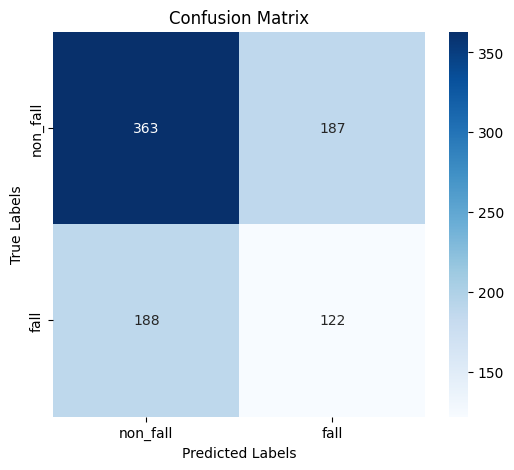

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Semua label kelas yang seharusnya
target_names = ['non_fall', 'fall']

# Prediksi model
y_true = val_generator.classes  # Label asli dari generator data validasi
y_pred = (model.predict(val_generator) > 0.3).astype(int)  # Prediksi model dengan threshold 0.5

# Menampilkan Classification Report
print(classification_report(y_true, y_pred, target_names=target_names, labels=np.arange(len(target_names))))

# Membuat Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan Confusion Matrix menggunakan Heatmap untuk visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/DataSlayer/Binary_Transferlearning_971.h5')

In [ ]:
from tensorflow.keras.models import save_model

save_model(model, '/content/drive/My Drive/DataSlayer/Binary_Transferlearning_dropout2.keras')

# EXPORT MARK

In [ ]:
# Tentukan folder yang ingin di-zip
folder_to_zip = '/content/output_masks'  # Ganti 'folder_name' dengan nama folder Anda
output_zip_file = '/content/output_masks.zip'  # Nama file ZIP yang akan dibuat

# Perintah zip untuk membuat file ZIP
!zip -r "{output_zip_file}" "{folder_to_zip}"

print(f"Folder '{folder_to_zip}' telah berhasil di-zip menjadi '{output_zip_file}'.")


  adding: content/output_masks/ (stored 0%)
  adding: content/output_masks/fall/ (stored 0%)
  adding: content/output_masks/fall/frame037_17.jpg (deflated 63%)
  adding: content/output_masks/fall/frame046_19.jpg (deflated 54%)
  adding: content/output_masks/fall/frame057_1.jpg (deflated 62%)
  adding: content/output_masks/fall/frame019_20.jpg (deflated 66%)
  adding: content/output_masks/fall/frame027_12.jpg (deflated 59%)
  adding: content/output_masks/fall/frame039_12.jpg (deflated 61%)
  adding: content/output_masks/fall/frame025_13.jpg (deflated 75%)
  adding: content/output_masks/fall/frame018_19.jpg (deflated 54%)
  adding: content/output_masks/fall/frame056_15.jpg (deflated 50%)
  adding: content/output_masks/fall/frame020_11.jpg (deflated 57%)
  adding: content/output_masks/fall/frame062_12.jpg (deflated 55%)
  adding: content/output_masks/fall/frame050_14.jpg (deflated 55%)
  adding: content/output_masks/fall/frame055_14.jpg (deflated 63%)
  adding: content/output_masks/fall/f

In [ ]:
# Path file sumber di Colab
source = "/content/output_masks.zip"

# Path tujuan di Google Drive
destination = "/content/drive/MyDrive/DataSlayer"

# Copy file
!cp "$source" "$destination"

print("File berhasil dicopy ke:", destination)

File berhasil dicopy ke: /content/drive/MyDrive/DataSlayer


# Run CSV

In [ ]:
print("Train Generator Class Indices:")
print(train_generator.class_indices)

Train Generator Class Indices:
{'non_fall': 0, 'fall': 1}


In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Muat Model CNN yang sudah dilatih
model = load_model('/content/drive/MyDrive/DataSlayer/Binary_Transferlearning_971.h5')  # Ganti dengan path model Anda

# 2. Tentukan folder data uji
test_folder = '/content/dataset/test'  # Ganti dengan folder yang berisi data uji

# 3. Gunakan ImageDataGenerator untuk memuat gambar dari folder
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi gambar

# Tentukan generator untuk memuat gambar dari folder
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),  # Sesuaikan dengan ukuran input model
    batch_size=32,
    class_mode='binary',  # Ganti dengan 'categorical' untuk klasifikasi multikelas
    shuffle=False  # Jangan acak, karena kita perlu urutan gambar yang sesuai
)

# 4. Prediksi dengan model
# Mendapatkan prediksi dari model (gunakan test_generator)
predictions = model.predict(test_generator, verbose=1)

# 5. Menyusun hasil prediksi
# Jika klasifikasi biner, kita bisa mengubah prediksi menjadi 0 atau 1
# if test_generator.class_mode == 'binary':
predicted_labels = (predictions > 0.39).astype(int)
# else:
#     # Untuk klasifikasi multikelas, ambil kelas dengan probabilitas tertinggi
#     predicted_labels = np.argmax(predictions, axis=1)

# 6. Membuat DataFrame dengan nama file dan label prediksi
filenames = test_generator.filenames  # Nama file gambar
results = pd.DataFrame({
    'filename': filenames,
    'predicted_label': predicted_labels.flatten()
})

# 7. Simpan ke file CSV
results.to_csv('/content/predictions.csv', index=False)

print("Prediksi telah disimpan ke predictions.csv")

Found 0 images belonging to 0 classes.


ValueError: Must provide at least one structure

#Bulk Run

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the pre-trained model
# model_path = '/content/drive/MyDrive/DataSlayer/87_CNN_mobileNet_multiclass.h5'
# model = load_model(model_path)

# Compile model (untuk prediksi saja, mungkin tidak perlu kompilasi lagi)
model.compile(
    loss='binary_crossentropy',  # categorical_crossentropy untuk multi-kelas
    optimizer=optimizer,
    metrics=['accuracy']
)

# Function untuk memuat dan memproses gambar
def load_and_process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Ukuran sesuai dengan model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Batch size = 1
    img_array = preprocess_input(img_array)  # Jika menggunakan MobileNetV2
    return img_array

# Path folder gambar
folder_path = '/content/dataset/test'  # Ganti dengan path folder Anda

# List untuk menyimpan hasil prediksi
results = []

# Iterasi melalui semua file dalam folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Cek apakah file adalah gambar
    if filename.lower().endswith(('png', 'jpg', 'jpeg')):
        print(f'Processing: {filename}')

        # Load dan proses gambar
        img_array = load_and_process_image(file_path)

        # Prediksi menggunakan model
        predictions = model.predict(img_array)

        # Menentukan kelas yang diprediksi (misalnya label 0 atau 1)
        predicted_labels = (predictions > 0.3).astype(int)

        # Simpan hasil prediksi
        results.append({
            'id': filename,  # Nama file gambar sebagai ID
            'label': int(predicted_labels)  # Label 0 atau 1
        })

# Convert hasil ke DataFrame
results_df = pd.DataFrame(results)

# Simpan hasil ke CSV
output_csv_path = '/content/drive/MyDrive/DataSlayer/Binary_Transferlearning_99.csv'
results_df.to_csv(output_csv_path, index=False)

print(f'Predictions saved to {output_csv_path}')

Processing: 32adea5fb1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Processing: 2779022ee3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Processing: e19ad17769.jpg


<ipython-input-102-fe166ea355e6>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'label': int(predicted_labels)  # Label 0 atau 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing: 555d0d8821.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Processing: d32a7f0f4e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Processing: 08f99d4d05.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processing: c4c0929b6a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Processing: 2297123d87.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processing: 5362e8562c.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Processing: 89b62290fd.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing: 1fae12e4cb.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing: 1069e32806.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing: 57cfe834c7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing: 7abcc0af16.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Processing: ad7266d142.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing: 9240478d88.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Processing: e0857f4089.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Processing: 7fd81c725c.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 